In [ ]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Libraries imported successfully")


In [ ]:
import pandas as pd

df = pd.read_excel("Online Retail.xlsx")
df.head()


In [3]:
df = pd.read_excel("Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape


(541909, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df = df.dropna(subset=['CustomerID'])


In [8]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
df.shape
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date


Timestamp('2011-12-10 12:50:00')

In [12]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Quantity': 'sum',                                        # Quantity
    'UnitPrice': 'mean'                                       # Avg price
})

rfm.columns = ['Recency', 'Frequency', 'Quantity', 'AvgUnitPrice']
rfm['Monetary'] = rfm['Quantity'] * rfm['AvgUnitPrice']

rfm = rfm[['Recency', 'Frequency', 'Monetary']]
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.600000
12347.0,2,7,6498.979011
12348.0,75,4,13495.487419
12349.0,19,1,5230.384932
12350.0,310,1,756.711765


In [13]:
rfm.describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4.338000e+03
mean,92.536422,4.272015,4.440660e+03
std,100.014169,7.697998,3.964704e+04
min,1.000000,1.000000,3.750000e+00
25%,18.000000,1.000000,4.748196e+02
50%,51.000000,2.000000,1.094993e+03
75%,142.000000,5.000000,2.779982e+03
max,374.000000,209.000000,1.667547e+06


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

rfm_scaled[:5]


array([[ 2.33457414, -0.4250965 ,  1.8349751 ],
       [-0.90534032,  0.3544168 ,  0.05192208],
       [-0.17535959, -0.03533985,  0.22841232],
       [-0.73534481, -0.4250965 ,  0.01992119],
       [ 2.17457836, -0.4250965 , -0.09292933]])

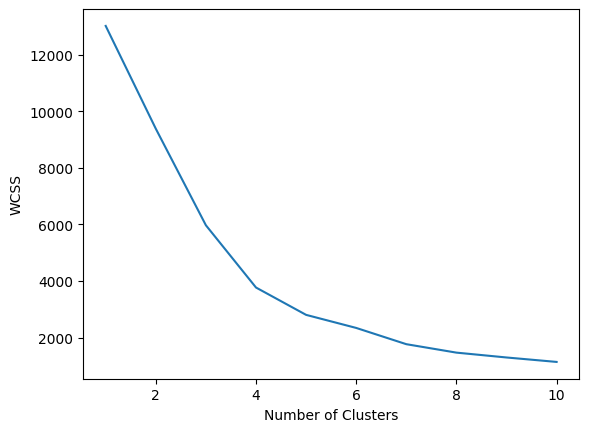

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.600000,1
12347.0,2,7,6498.979011,0
12348.0,75,4,13495.487419,0
12349.0,19,1,5230.384932,0
12350.0,310,1,756.711765,1


In [17]:
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,41.423136,4.672440,3.559658e+03
1,247.204440,1.581869,1.037580e+03
2,4.190476,78.142857,1.216987e+05
3,62.000000,25.000000,1.359304e+06


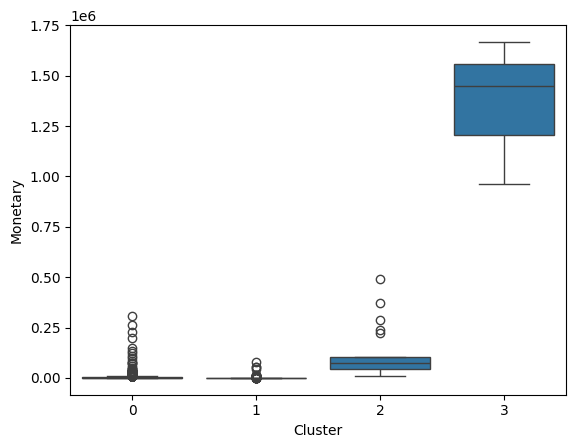

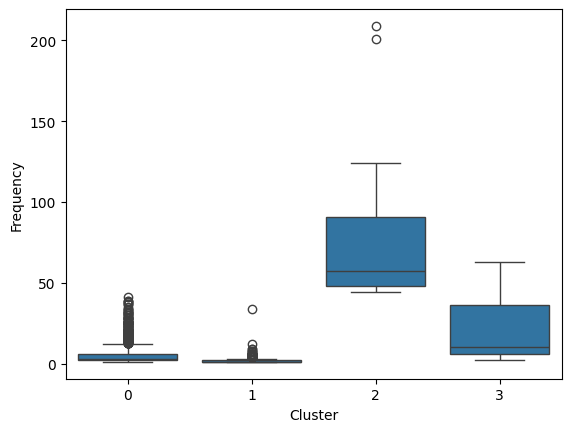

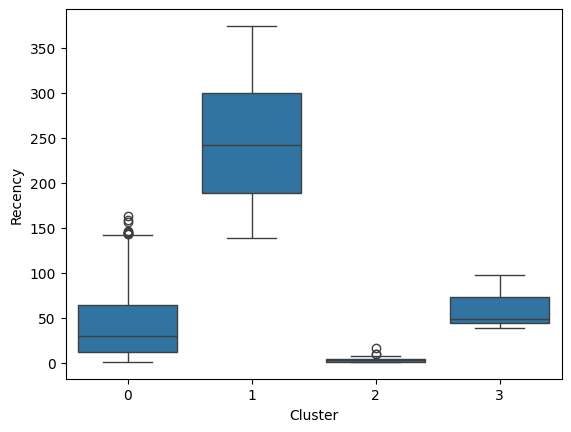

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.show()

sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.show()

sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.show()
